In [2]:
import matplotlib.pyplot as plt
from matplotlib import rc

rc('text', usetex=True)
rc('font', family='serif')

C:\Users\dcald\AppData\Local\Temp\ipykernel_17004\3749209235.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data=pd.read_csv("OU-process-std.txt", delim_whitespace=True, header=None,encoding="utf-16")
C:\Users\dcald\AppData\Local\Temp\ipykernel_17004\3749209235.py:15: RuntimeWarning: invalid value encountered in sqrt
  return A * np.sqrt(1.0 - np.exp(-2.0 * B * t))


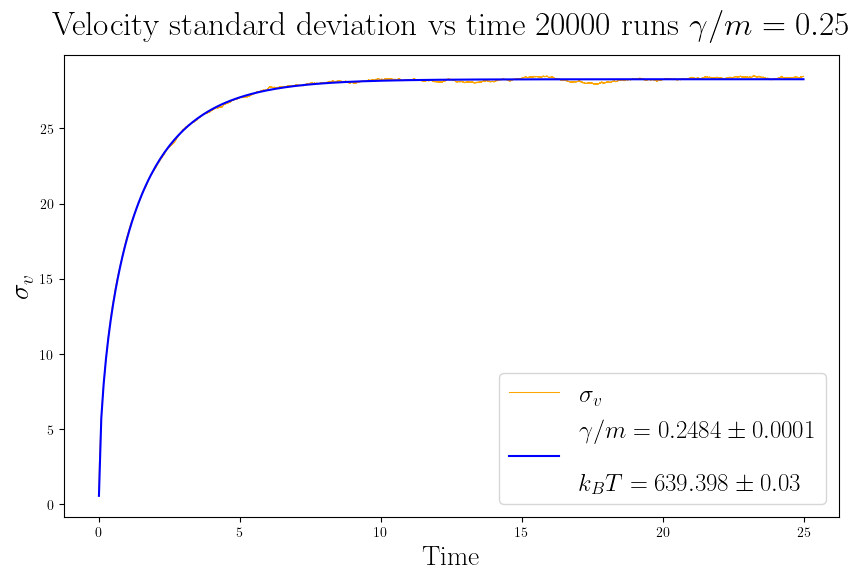

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 1) LOAD DATA ---------------------

data=pd.read_csv("OU-process-std.txt", delim_whitespace=True, header=None,encoding="utf-16")
# Assign column names for clarity
data.columns = ['Time', 'STD']

# 2) DEFINE THE OU STD FUNCTION
# -------------------------------
def ou_std_func(t, A, B):
    return A * np.sqrt(1.0 - np.exp(-2.0 * B * t))

# 3) CURVE FIT TO EXTRACT A & B
# -------------------------------
t_data = data['Time'].values
std_data = data['STD'].values

# A good initial guess:
#   - A ~ the final std value (because at large t, sigma_v(t)-> A)
#   - B ~ 1 or something modest
p0 = [std_data[-1], 1.0]

# Perform nonlinear least-squares fitting
popt, pcov = curve_fit(ou_std_func, t_data, std_data, p0=p0)
A_fit, B_fit = popt

# Extract uncertainties from diagonal of covariance matrix
A_err, B_err = np.sqrt(np.diag(pcov))

# If you know the mass (in your simulation units), say m=1.0 or something else:
m = 0.8
kBT_fit = (A_fit**2) * m
gamma_fit = B_fit

gamma_err = B_err
kBT_err = 2.0 * A_fit * m * A_err

# -------------------------------
# 4) PLOT THE FIT CURVE
# -------------------------------
t_fit = np.linspace(t_data.min(), t_data.max(), 300)
std_fit = ou_std_func(t_fit, A_fit, B_fit)

# Plotting the time series
plt.figure(figsize=(10, 6))
plt.plot(data['Time'], data['STD'], label=r'$\sigma_v$',color='orange', linewidth=0.75)
plt.plot(t_fit, std_fit, color='blue',label = 
    f"$\\gamma/m = {gamma_fit:.4f}\\pm{gamma_err:.4f}$\n\n"
    f"$k_B T = {kBT_fit:.3f}\\pm{kBT_err:.2f}$"
)
# Adding labels, title, and legend
plt.title(r' Velocity standard deviation vs time $20000$ runs $\gamma/m = 0.25$', fontsize=24,pad=15)
plt.xlabel(r'Time', fontsize=20)
plt.ylabel(r'$\sigma_v$', fontsize=20)
plt.legend(fontsize=18)
# Display the plot
#plt.show()
plt.savefig('OU-process-std.pdf',format='pdf')

